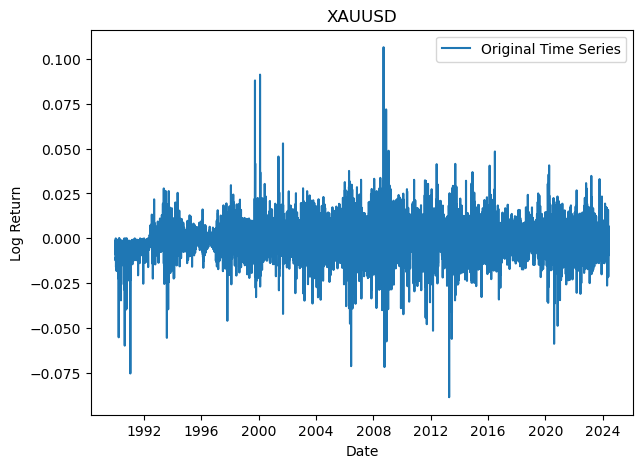

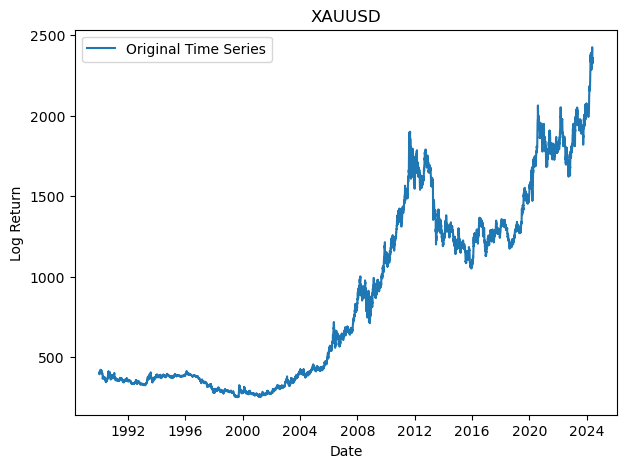

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# https://www.investing.com/currencies/xau-usd-historical-data
xauusd = pd.read_csv('xauusd.csv', usecols=['Date', 'Price', 'Open'])
xauusd['Price'] = xauusd['Price'].str.replace(',', '').astype(float)
xauusd['Open'] = xauusd['Open'].str.replace(',', '').astype(float)
xauusd['Return'] = np.log(xauusd['Price']/xauusd['Open'])

xauusd['Date'] = pd.to_datetime(xauusd['Date'])
xauusd.set_index('Date', inplace=True)
xauusd.sort_index(inplace=True)
xauusd.index = pd.DatetimeIndex(xauusd.index)
xauusd.index.freq = pd.infer_freq(xauusd.index)

# Plot the original time series data
plt.figure(figsize=(7, 5))
plt.plot(xauusd['Return'], label='Original Time Series')
plt.title('XAUUSD')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

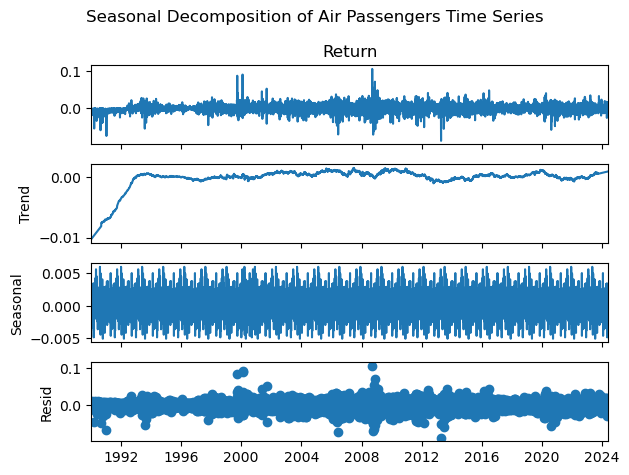

In [32]:

# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(xauusd['Return'], model='additive', period=365, extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()

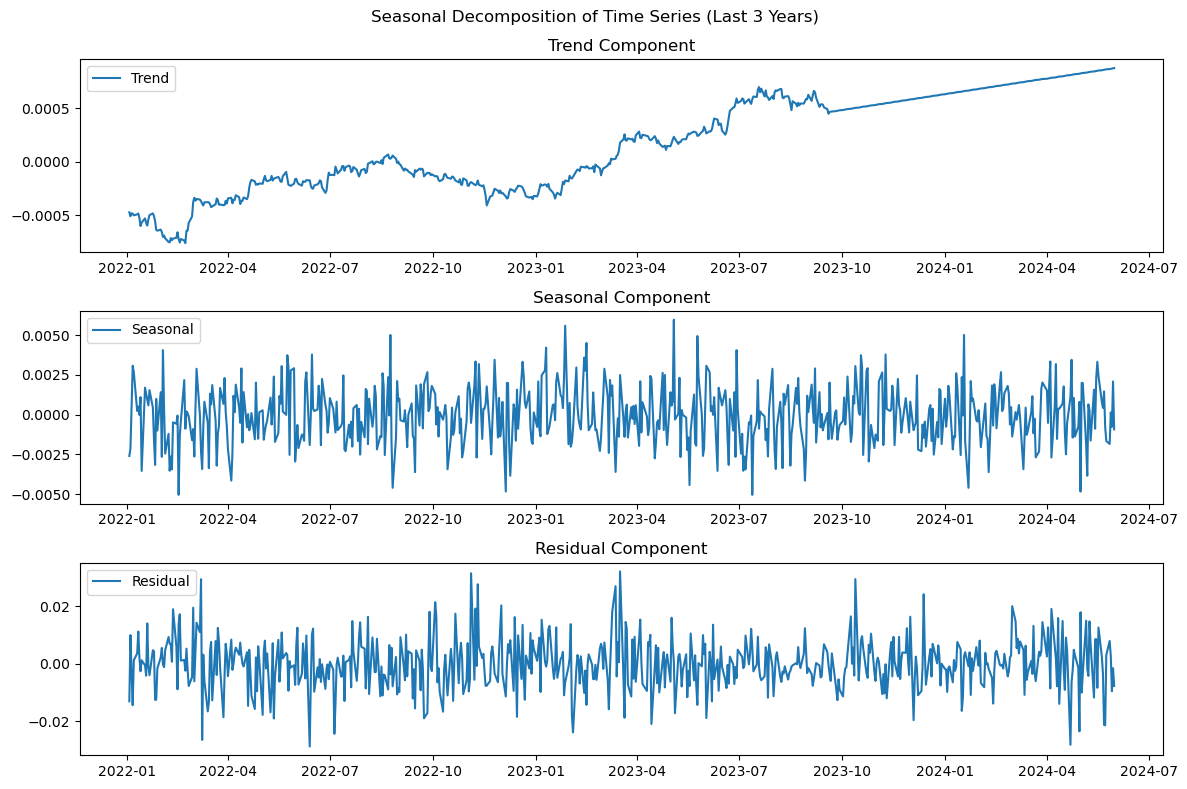

In [35]:
# Define the time range for the last three years
start_date = '2022-01-01'
end_date = '2024-12-31'

# Slice the decomposition results
trend = result.trend[start_date:end_date]
seasonal = result.seasonal[start_date:end_date]
resid = result.resid[start_date:end_date]

# Plot the decomposition results for the specified range
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(312)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(313)
plt.plot(resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.suptitle('Seasonal Decomposition of Time Series (Last 3 Years)')
plt.tight_layout()
plt.show()


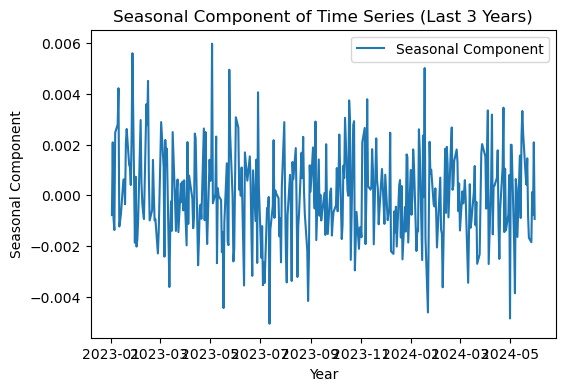

In [38]:
start_date = '2023-01-01'
end_date = '2024-12-31'

# Slice the seasonal component for the last three years
seasonal_last_3_years = result.seasonal[start_date:end_date]

# Plot the seasonal component for the last three years
plt.figure(figsize=(6, 4))
plt.plot(seasonal_last_3_years, label='Seasonal Component')
plt.title('Seasonal Component of Time Series (Last 3 Years)')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()